#TRÍCH XUẤT DỮ LIỆU

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df = pd.read_excel('/content/drive/MyDrive/dataset/ELC3007-105-101-BaiTapNhom.xlsx', sheet_name='data')
df

,Thời gian tạo đơn,Mã đơn hàng,Mã khách hàng,Tên khách hàng,Mã PKKH,Mô tả Phân Khúc Khách hàng,Mã nhóm hàng,Tên nhóm hàng,Mã mặt hàng,Tên mặt hàng,SL,Đơn giá,Thành tiền
0,2022-01-01 08:38:30,ORD0000001,CUZ00001,Mai Thị Bích Thảo,C1,"Văn phòng, người làm tự do, nội trợ mua đồ ăn ...",DKH,Đồ khô,DKH10,Snack tai heo 400g,1,36000,36000
1,2022-01-01 09:45:46,ORD0000002,CUZ00002,Đoàn Trọng Nhân,A3,"Sinh viên, học sinh thích đi chơi với bạn bè, ...",BAN,Bánh,BAN01,Bánh xoài Nha Trang,1,16000,16000
2,2022-01-01 09:45:46,ORD0000002,CUZ00002,Đoàn Trọng Nhân,A3,"Sinh viên, học sinh thích đi chơi với bạn bè, ...",DKH,Đồ khô,DKH02,Khô gà lá chanh 200g,1,54000,54000
3,2022-01-01 10:10:08,ORD0000003,CUZ00003,Dương Hồng Thái,A3,"Sinh viên, học sinh thích đi chơi với bạn bè, ...",DKH,Đồ khô,DKH02,Khô gà lá chanh 200g,1,54000,54000
4,2022-01-01 10:20:46,ORD0000004,CUZ00004,Phạm Quang Vĩ,C2,"Văn phòng, người làm tự do, nội trợ quan tâm đ...",DHT,Đồ ăn Healthy,DHT02,Ngũ cốc sữa chua hoa quả màu tím,1,60000,60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7116,2022-12-31 21:48:11,ORD0006209,CUZ02650,Nguyễn Tấn Thành,B3,"Nhân viên văn phòng, người làm tự do mua đ...",DKH,Đồ khô,DKH07,Bắp sấy 400g,1,37000,37000
7117,2022-12-31 22:35:55,ORD0006210,CUZ00525,Nguyễn Anh Phước,C1,"Văn phòng, người làm tự do, nội trợ mua đồ ăn ...",DKH,Đồ khô,DKH08,Snack sò 400g,1,36000,36000
7118,2022-12-31 22:51:53,ORD0006211,CUZ01996,Vũ Thế Nhân,C1,"Văn phòng, người làm tự do, nội trợ mua đồ ăn ...",DKH,Đồ khô,DKH05,Hoa quả sấy 500g,1,34000,34000
7119,2022-12-31 23:16:38,ORD0006212,CUZ00922,Đào Mạnh Hiếu,A3,"Sinh viên, học sinh thích đi chơi với bạn bè, ...",BAN,Bánh,BAN09,Bánh mix nội địa Trung,1,100000,100000


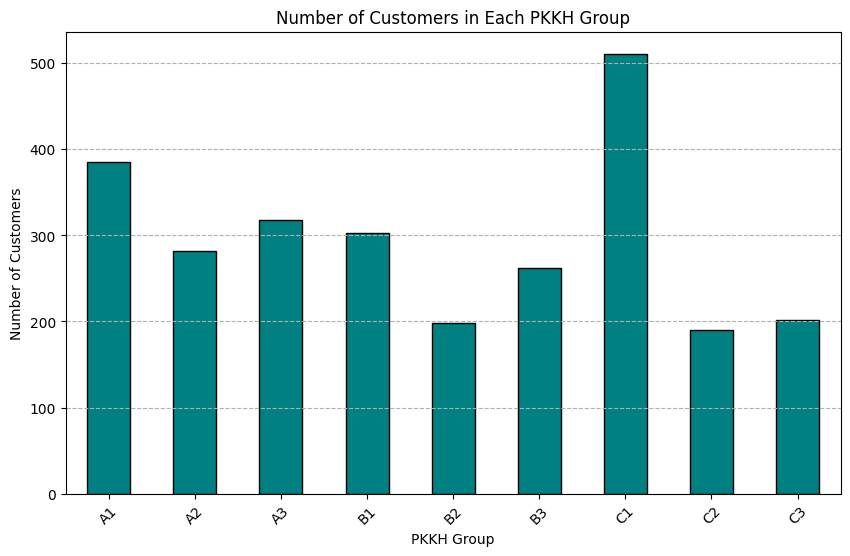

In [22]:
customers_per_pkkh = df.groupby('Mã PKKH')['Mã khách hàng'].nunique()
# Plot the number of customers in each PKKH group
plt.figure(figsize=(10, 6))
customers_per_pkkh.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Number of Customers in Each PKKH Group')
plt.xlabel('PKKH Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()



> Tổng quan trong năm vừa qua ta quan sát được phần lớn nhóm khách hàng C1 đứng vị trí cao nhất tiếp đó là A1 và thấp nhất kà B2 C2 C3



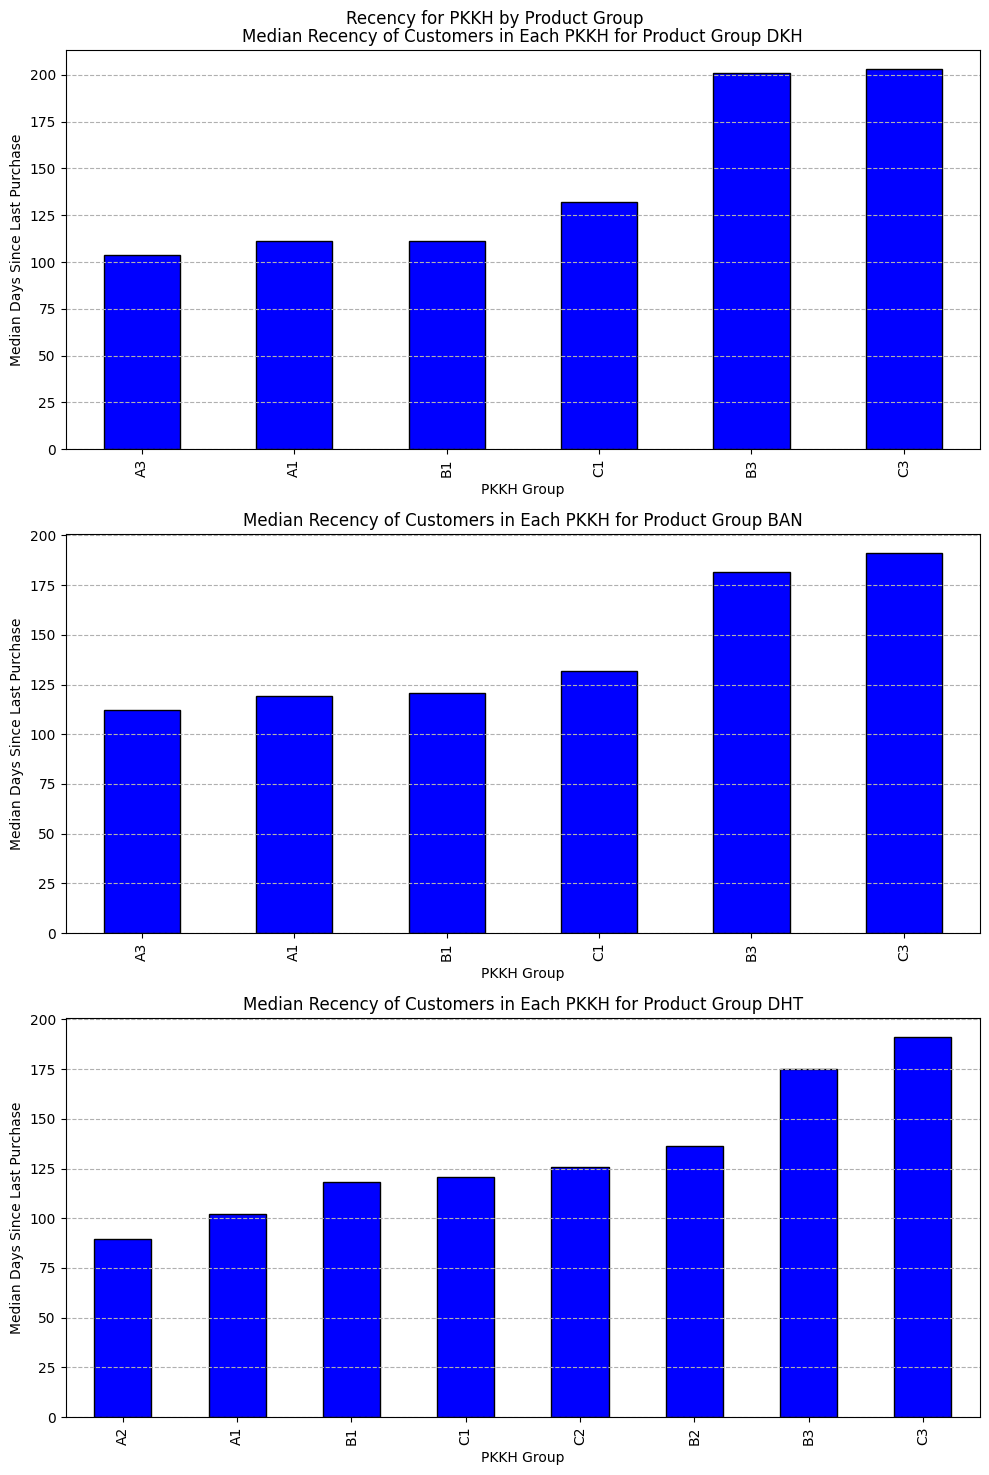

In [27]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
plot_recency_for_pkkh_by_product_group('DKH', ax=axes[0])
plot_recency_for_pkkh_by_product_group('BAN', ax=axes[1])
plot_recency_for_pkkh_by_product_group('DHT', ax=axes[2])
fig.suptitle('Recency for PKKH by Product Group')
plt.tight_layout()
plt.show()


# CÁC HÀM KHỞI TẠO



## **RECENCY**:

### Hàm để trực quan độ recency của từng khách hàng theo PKKH

In [13]:
def plot_top_10_recency_for_customers_in_pkkh(pkkh):
    df['Thời gian tạo đơn'] = pd.to_datetime(df['Thời gian tạo đơn'])
    filtered_data = df[df['Mã PKKH'] == pkkh]
    if filtered_data.empty:
        print(f"No data found for PKKH: {pkkh}")
        return
    current_time = df['Thời gian tạo đơn'].max()
    last_purchase = filtered_data.groupby('Mã khách hàng')['Thời gian tạo đơn'].max()
    recency = (current_time - last_purchase).dt.days
    recency_sorted = recency.sort_values().head(10)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(recency_sorted.index, recency_sorted.values, color='purple', edgecolor='black')
    plt.title(f'Top 10 Recency of Customers in PKKH {pkkh}')
    plt.xlabel('Customer ID')
    plt.ylabel('Days Since Last Purchase')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.show()

### Hàm để trưc quan độ rececy của từng PKKH theo từng mã nhóm hàng

In [26]:
def plot_recency_for_pkkh_by_product_group(ma_nhom_hang, ax):
    # Filter data for the specified product group
    df['Thời gian tạo đơn'] = pd.to_datetime(df['Thời gian tạo đơn'])
    filtered_data = df[df['Mã nhóm hàng'] == ma_nhom_hang]
    if filtered_data.empty:
        print(f"No data found for Product Group: {ma_nhom_hang}")
        return

    current_time = filtered_data['Thời gian tạo đơn'].max()

    last_purchase = filtered_data.groupby(['Mã PKKH', 'Mã khách hàng'])['Thời gian tạo đơn'].max()
    recency = (current_time - last_purchase).dt.days.reset_index(name='Recency')

    median_recency_by_pkkh = recency.groupby('Mã PKKH')['Recency'].median().sort_values()

    median_recency_by_pkkh.plot(kind='bar', color='blue', edgecolor='black', ax=ax)
    ax.set_title(f'Median Recency of Customers in Each PKKH for Product Group {ma_nhom_hang}')
    ax.set_xlabel('PKKH Group')
    ax.set_ylabel('Median Days Since Last Purchase')
    ax.grid(axis='y', linestyle='--')


### Hàm để trưc quan độ recency của từng khách hàng theo PKKH VÀ MÃ nhóm HÀNG


In [12]:
def plot_top_10_recency_for_customers_in_pkkh1(pkkh, ma_nhom_hang):
    df['Thời gian tạo đơn'] = pd.to_datetime(df['Thời gian tạo đơn'])
    filtered_data = df[(df['Mã PKKH'] == pkkh) & (df['Mã nhóm hàng'] == ma_nhom_hang)]
    if filtered_data.empty:
        print(f"No data found for PKKH: {pkkh} and Product Code: {ma_nhom_hang}")
        return
    current_time = df['Thời gian tạo đơn'].max()

    last_purchase = filtered_data.groupby('Mã khách hàng')['Thời gian tạo đơn'].max()
    recency = (current_time - last_purchase).dt.days
    recency_sorted = recency.sort_values().head(10)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(recency_sorted.index, recency_sorted.values, color='purple', edgecolor='black')
    plt.title(f'Top 10 Recency of Customers in PKKH {pkkh} for Product Code {ma_nhom_hang}')
    plt.xlabel('Customer ID')
    plt.ylabel('Days Since Last Purchase')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.show()


## **FREQUANCY**:


### Hàm đê trực quan độ frequancy của từng PKKH theo từng mã nhóm hàng

In [30]:
def plot_frequency_for_pkkh_by_product_group(ma_nhom_hang, ax):

    df['Thời gian tạo đơn'] = pd.to_datetime(df['Thời gian tạo đơn'])
    filtered_data = df[df['Mã nhóm hàng'] == ma_nhom_hang]
    if filtered_data.empty:
        print(f"No data found for Product Group: {ma_nhom_hang}")
        return


    frequency = filtered_data['Mã PKKH'].value_counts().sort_index()

    frequency.plot(kind='bar', color='green', edgecolor='black', ax=ax)
    ax.set_title(f'Frequency of Customers in Each PKKH for Product Group {ma_nhom_hang}')
    ax.set_xlabel('PKKH Group')
    ax.set_ylabel('Frequency of Purchases')
    ax.grid(axis='y', linestyle='--')

## **MONETARY** :

### Hàm để trực quan độ Monetary của từng PKKH theo từng mã nhóm hàng


In [33]:
def plot_monetary_for_pkkh_by_product_group(ma_nhom_hang, ax):
    # Ensure the 'Thời gian tạo đơn' column is in datetime format
    df['Thời gian tạo đơn'] = pd.to_datetime(df['Thời gian tạo đơn'])

    # Filter the data for the specified product group
    filtered_data = df[df['Mã nhóm hàng'] == ma_nhom_hang]

    # Check if the filtered data is empty and return if true
    if filtered_data.empty:
        print(f"No data found for Product Group: {ma_nhom_hang}")
        return

    # Calculate the total monetary value for each PKKH within the filtered data
    monetary = filtered_data.groupby('Mã PKKH')['Thành tiền'].sum()

    # Plot the monetary values
    monetary.plot(kind='bar', color='goldenrod', edgecolor='black', ax=ax)
    ax.set_title(f'Total Monetary Value in Each PKKH for Product Group {ma_nhom_hang}')
    ax.set_xlabel('PKKH Group')
    ax.set_ylabel('Total Monetary Value')
    ax.grid(axis='y', linestyle='--')

## **RFM SCORE** :

### Hàm để trực quan độ RFM của từng PKKH theo từng mã nhóm hàng

In [41]:
def calculate_weighted_rfm(df, ma_nhom_hang, ax):
    # Ensure datetime format for the order creation time
    df['Thời gian tạo đơn'] = pd.to_datetime(df['Thời gian tạo đơn'])

    # Filter data for the specified product group
    filtered_data = df[df['Mã nhóm hàng'] == ma_nhom_hang]

    # If there's no data, return
    if filtered_data.empty:
        print(f"No data found for Product Group: {ma_nhom_hang}")
        return

    # Calculate Recency, Frequency, and Monetary
    recency = filtered_data.groupby(['Mã PKKH', 'Mã khách hàng'])['Thời gian tạo đơn'].max()
    recency = (recency.max() - recency).dt.days
    frequency = filtered_data.groupby(['Mã PKKH', 'Mã khách hàng']).size()
    monetary = filtered_data.groupby(['Mã PKKH', 'Mã khách hàng'])['Thành tiền'].sum()

    # Normalize RFM metrics
    recency_norm = (recency - recency.min()) / (recency.max() - recency.min())
    frequency_norm = (frequency - frequency.min()) / (frequency.max() - frequency.min())
    monetary_norm = (monetary - monetary.min()) / (monetary.max() - monetary.min())

    # Calculate Weighted RFM Score
    weighted_rfm_score = 0.15 * recency_norm + 0.28 * frequency_norm + 0.57 * monetary_norm

    # Plotting
    weighted_rfm_score.groupby('Mã PKKH').mean().sort_values(ascending=False).plot(kind='bar', color='darkblue', edgecolor='black', ax=ax)
    ax.set_title(f'Average Weighted RFM Score by PKKH for Product Group {ma_nhom_hang}')
    ax.set_xlabel('PKKH Group')
    ax.set_ylabel('Average Weighted RFM Score')
    ax.grid(axis='y', linestyle='--')

### Hàm để trực quan độ RFM của từng TÊN KHÁCH HÀNG theo từng mã nhóm hàng

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_rfm_for_customers_by_pkkh_and_product_group(df, ma_nhom_hang):
    # Convert 'Thời gian tạo đơn' to datetime format
    df['Thời gian tạo đơn'] = pd.to_datetime(df['Thời gian tạo đơn'])

    # Filter the data for the specified product group
    filtered_data = df[df['Mã nhóm hàng'] == ma_nhom_hang]

    if filtered_data.empty:
        print(f"No data found for Product Group: {ma_nhom_hang}")
        return

    # Calculate RFM metrics
    rfm_data = filtered_data.groupby('Tên khách hàng').agg({
        'Thời gian tạo đơn': lambda x: (filtered_data['Thời gian tạo đơn'].max() - x.max()).days,
        'Mã đơn hàng': 'count',
        'Thành tiền': 'sum'
    })

    # Rename columns
    rfm_data.rename(columns={
        'Thời gian tạo đơn': 'Recency',
        'Mã đơn hàng': 'Frequency',
        'Thành tiền': 'Monetary'
    }, inplace=True)

    # Get top 10 customers
    top_10_customers = rfm_data.sort_values('Monetary', ascending=False).head(10)

    # Plotting
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    sns.barplot(x='Recency', y=top_10_customers.index, data=top_10_customers.sort_values('Recency'), ax=axs[0], palette='viridis')
    axs[0].set_title('Recency')
    axs[0].set_xlabel('Days Since Last Purchase')
    axs[0].set_ylabel('Customer Name')

    sns.barplot(x='Frequency', y=top_10_customers.index, data=top_10_customers.sort_values('Frequency', ascending=False), ax=axs[1], palette='viridis')
    axs[1].set_title('Frequency')
    axs[1].set_xlabel('Number of Purchases')

    sns.barplot(x='Monetary', y=top_10_customers.index, data=top_10_customers.sort_values('Monetary', ascending=False), ax=axs[2], palette='viridis')
    axs[2].set_title('Monetary')
    axs[2].set_xlabel('Total Spending')

    plt.tight_layout()
    plt.show()


# Tổng quan về hành vi PKKH

## Tổng số đơn hàng được thực hiện bởi các nhóm phân khúc khách hàng

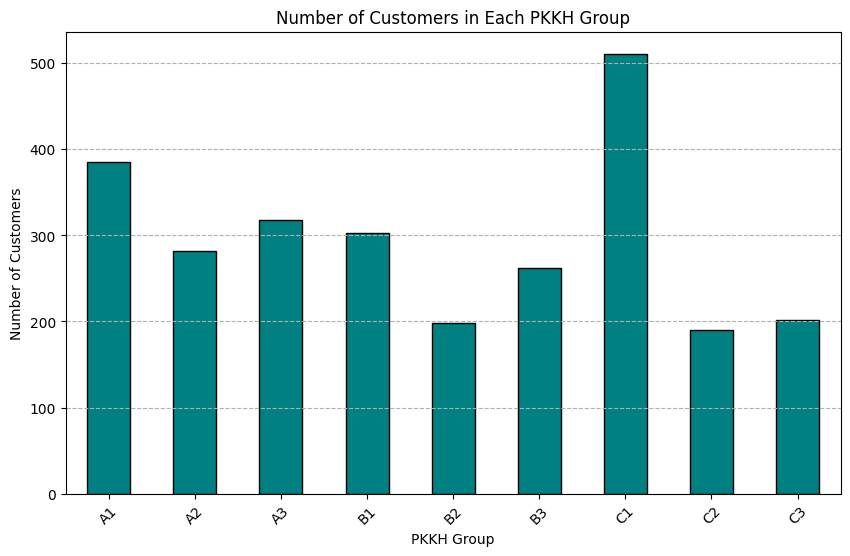

In [45]:
customers_per_pkkh = df.groupby('Mã PKKH')['Mã khách hàng'].nunique()
# Plot the number of customers in each PKKH group
plt.figure(figsize=(10, 6))
customers_per_pkkh.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Number of Customers in Each PKKH Group')
plt.xlabel('PKKH Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()



> Năm vừa qua ta thấy được tổng số đơn hàng được thực hiện bởi các PKKH trong đó
- Đứng đầu là C1 điều đó lí dãi : ..... Ngọc....
- Đứng vị trí thứ 2 đén từ nhóm khách hàng A2 điều đó lí dãi bởi
    - Đặc tính của Phân Khúc: Nhóm A1 gồm học sinh và sinh viên, đây là những khách hàng có lối sống và hành vi tiêu dùng đặc trưng, thích giải trí và có xu hướng tiêu dùng cao với các sản phẩm ăn vặt.
    - Giá cả và khả năng tiếp cận: Các sản phẩm dành cho nhóm A1 có thể có giá cả phải chăng và dễ tiếp cận thông qua các kênh bán hàng trực tuyến, khuyến khích mua sắm thường xuyên.
    - Sự kết nối cộng đồng: Nhóm A1 có thể bị thu hút bởi cơ hội giao lưu và chia sẻ trải nghiệm với cộng đồng, thúc đẩy họ mua sắm nhiều hơn để không cảm thấy bị bỏ lỡ so với bạn bè.
- Thấp nhất đến từ vị trí C2 điều đó được lý dải bởi : .....NGọc.....





## Đô Rececy của các nhóm phân khúc khách hàng theo mã nhóm hàng

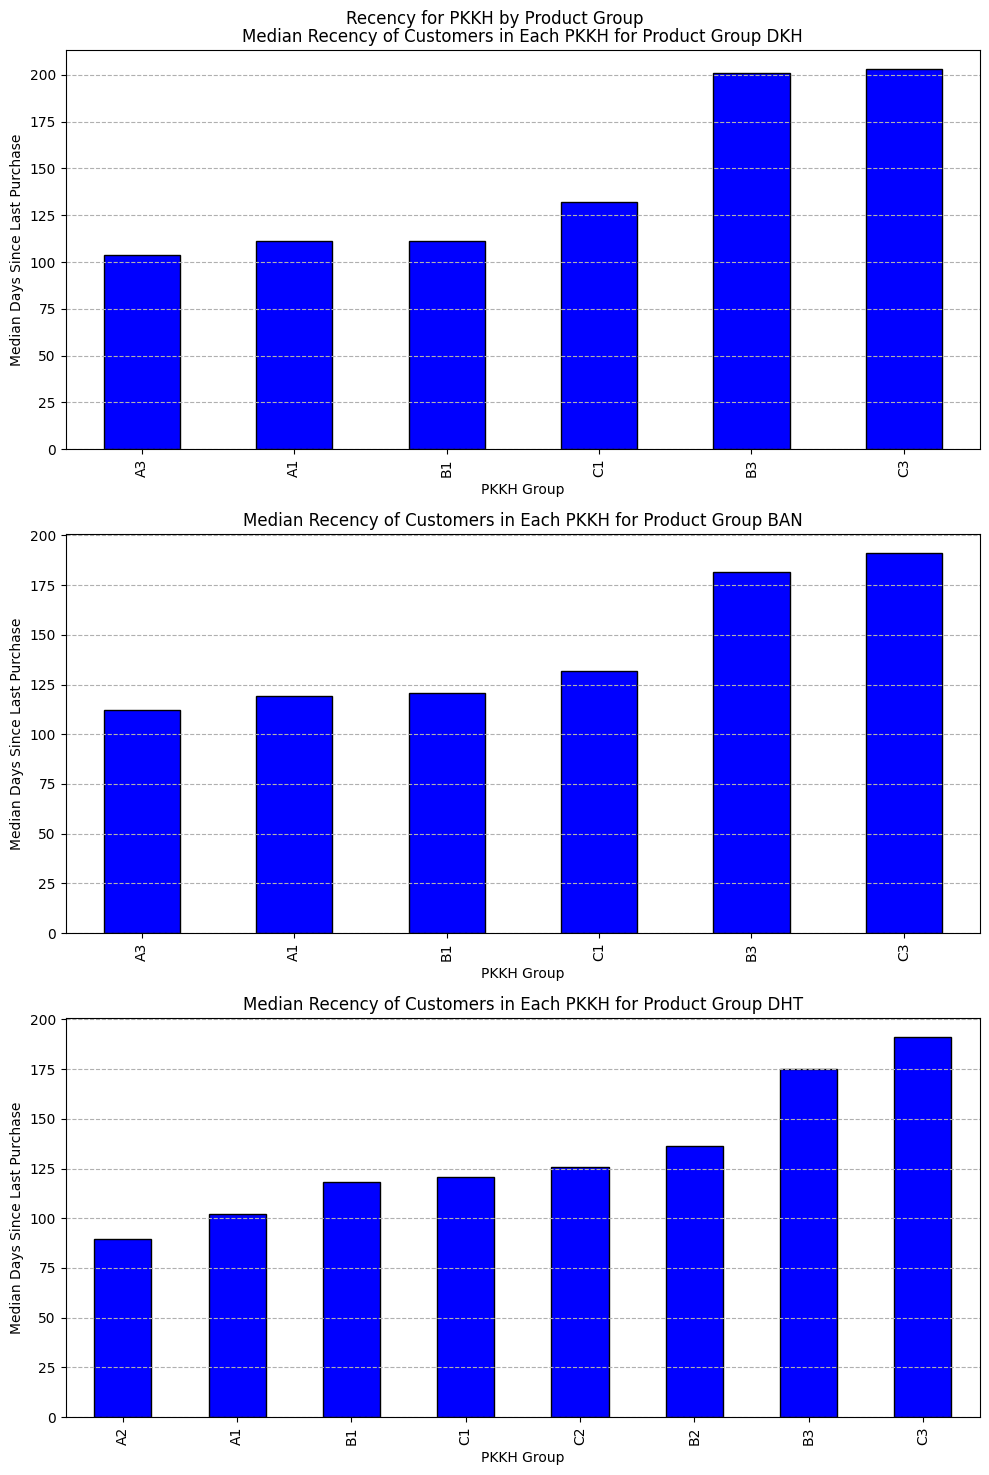

In [46]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
plot_recency_for_pkkh_by_product_group('DKH', ax=axes[0])
plot_recency_for_pkkh_by_product_group('BAN', ax=axes[1])
plot_recency_for_pkkh_by_product_group('DHT', ax=axes[2])
fig.suptitle('Recency for PKKH by Product Group')
plt.tight_layout()
plt.show()




> **Đối với sản phẩm DKH (Đồ khô)**
- A1 VÀ A3 đều là nhóm khách hàng ưa chuộng đồ ăn vặt trong đó đồ khô lại là một trong những loại có nhiều sản phẩm giới trẻ thích nên tổng số thời gian mà 2 nhóm khác hàng này mua lặp lại là ngắn nhất
    - Với A1 nhóm khách hàng này phần lớn là sinh viên học sinh các loại sản phẩm đồ khô thường có giá rẽ tiện lợi và đặc biệt rất hợp khẩu vị đối với giới trẻ 16-22 tuổi
    - Với A3 đây là nhóm khách hàng với như cầu là các sản phẩm có tính tiện lợi và dễ bảo quản để phù hợp cho việc mang theo đi chơi cho các buổi tiệc hay picnic
    - Với A2 thì đặc tính là nhóm khách hàng quan tâm đến sức khỏe thì nhóm mặt hàng này không được ưu chuộng đối với họ
- B1 VÀ B3 : Phước
- C1 VÀ C3 : NGỌC

> **Đối với sản phẩm BAN (Bánh)**
- A1 VÀ A3 đều là nhóm khách hàng ưa chuộng đồ ăn ăn vặt trong đó bánh lại là một trong những loại có nhiều sản phẩm giới trẻ thích tổng số thời gian mà 2 nhóm khác hàng này mua lặp lại là ngắn nhất
    - Với A1 nhóm khách hàng này phần lớn là sinh viên học sinh các loại sản phẩm bánh thường có giá rẽ , tiện lợi và đặc biệt rất hợp khẩu vị đối với giới trẻ 16-22 tuổi
    - Với A3 đây là nhóm khách hàng với như cầu là các sản phẩm có tính tiện lợi và dễ bảo quản để phù hợp cho việc mang theo đi chơi cho các buổi tiệc hay picnic
    - Với A2 thì đặc tính là nhóm khách hàng quan tâm đến sức khỏe thì nhóm mặt hàng này không được ưu chuộng đối với họ
- B1 VÀ B3 : Phước
- C1 VÀ C3 : NGỌC

> **Đối với sản phẩm DHT (Đồ ăn healthy)**
- A2 VÀ A1 đều nhóm khách hàng ưa chuộng đồ ăn healthy , trong đó A2 là nhóm khách hàng quan tâm đến sức khỏe nên tần suất mua lặp lại đối với loại sản phẩm này là vô cùng ngắn
    - A2 với đặc tính quan tâm đến sức khỏe họ có tính ưu chuộng đối với các sản phẩm lành mạnh
- B1 B2 VÀ B3 : Phước
- C1 C2 VÀ C3 : NGỌC

## Độ Frequancy của các nhóm phân khúc khách hàng theo mã nhóm hàng

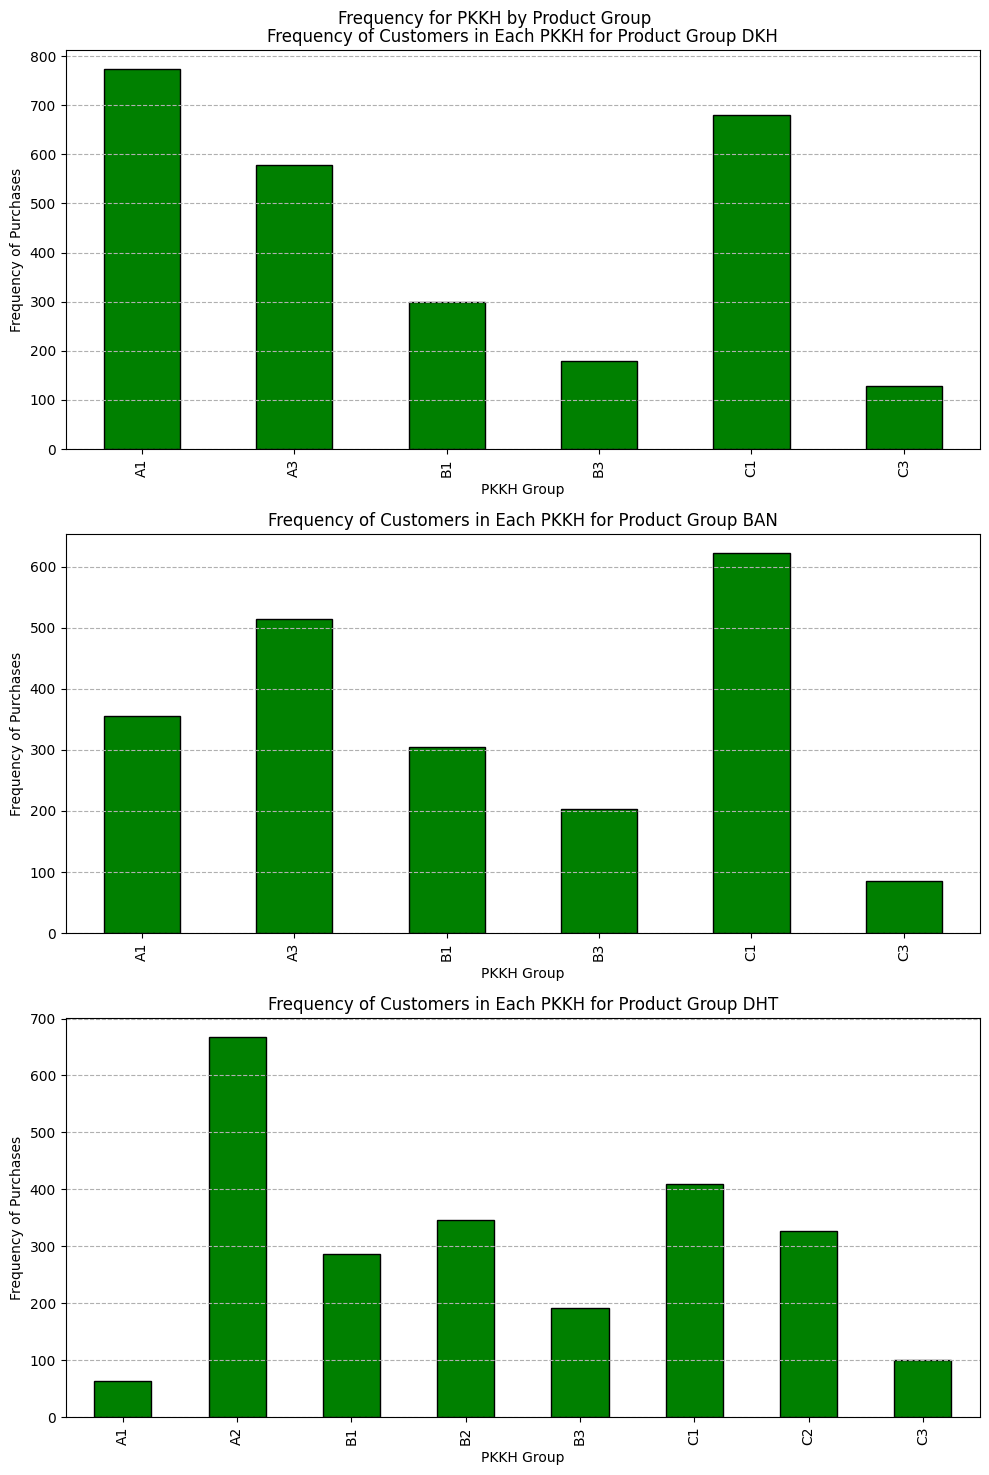

In [47]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
plot_frequency_for_pkkh_by_product_group('DKH', ax=axes[0])
plot_frequency_for_pkkh_by_product_group('BAN', ax=axes[1])
plot_frequency_for_pkkh_by_product_group('DHT', ax=axes[2])
fig.suptitle('Frequency for PKKH by Product Group')
plt.tight_layout()
plt.show()




> **Đối với sản phẩm DKH (Đồ khô)**
- A1 VÀ A3 đều là nhóm khách hàng ưa chuộng đồ ăn vặt trong đó đồ khô lại là một trong những loại có nhiều sản phẩm giới trẻ thích nên tổng số đơn hàng được thực hiện bởi 2 nhóm khách hàng này là nhiều nhất
    - Với A1 nhóm khách hàng này phần lớn là sinh viên học sinh các loại sản phẩm đồ khô thường có giá rẽ tiện lợi và đặc biệt rất hợp khẩu vị đối với giới trẻ 16-22 tuổi
    - Với A3 đây là nhóm khách hàng với như cầu là các sản phẩm có tính tiện lợi và dễ bảo quản để phù hợp cho việc mang theo đi chơi cho các buổi tiệc hay picnic
    - Với A2 thì đặc tính là nhóm khách hàng quan tâm đến sức khỏe thì nhóm mặt hàng này không được ưu chuộng đối với họ
- B1 VÀ B3 : Phước
- C1 VÀ C3 : NGỌC

> **Đối với sản phẩm BAN (Bánh)**
- A1 VÀ A3 đều là nhóm khách hàng ưa chuộng đồ  ăn vặt trong đó bánh lại là một trong những loại có nhiều sản phẩm giới trẻ thích nên tổng số đơn hàng được thực hiện bởi nhóm khách hàng A1 là nhiều nhất
    - Với A1 nhóm khách hàng này phần lớn là sinh viên học sinh các loại sản phẩm bánh thường có giá rẽ , tiện lợi và đặc biệt rất hợp khẩu vị đối với giới trẻ 16-22 tuổi
    - Với A3 đây là nhóm khách hàng với như cầu là các sản phẩm có tính tiện lợi và dễ bảo quản để phù hợp cho việc mang theo đi chơi cho các buổi tiệc hay picnic
    - Với A2 thì đặc tính là nhóm khách hàng quan tâm đến sức khỏe thì nhóm mặt hàng này không được ưu chuộng đối với họ
- B1 VÀ B3 : Phước
- C1 VÀ C3 : NGỌC

> **Đối với sản phẩm DHT (Đồ ăn healthy)**
- A2 VÀ A1 đều nhóm khách hàng ưa chuộng đồ ăn healthy , trong đó A2 là nhóm khách hàng quan tâm đến sức khỏe nên tổng số đơn hàng được thực hiện bởi nhóm khách hàng A2 là nhiều nhất
    - A2 với đặc tính quan tâm đến sức khỏe họ có tính ưu chuộng đối với các sản phẩm lành mạnh
    - A1 Thì không quan tâm nhiều đối với sản phẩm này là do về mặt giá cả
- B1 B2 VÀ B3 : Phước
- C1 C2 VÀ C3 : NGỌC



## Độ Monetary của các nhóm phân khúc khách hàng theo mã nhóm hàng

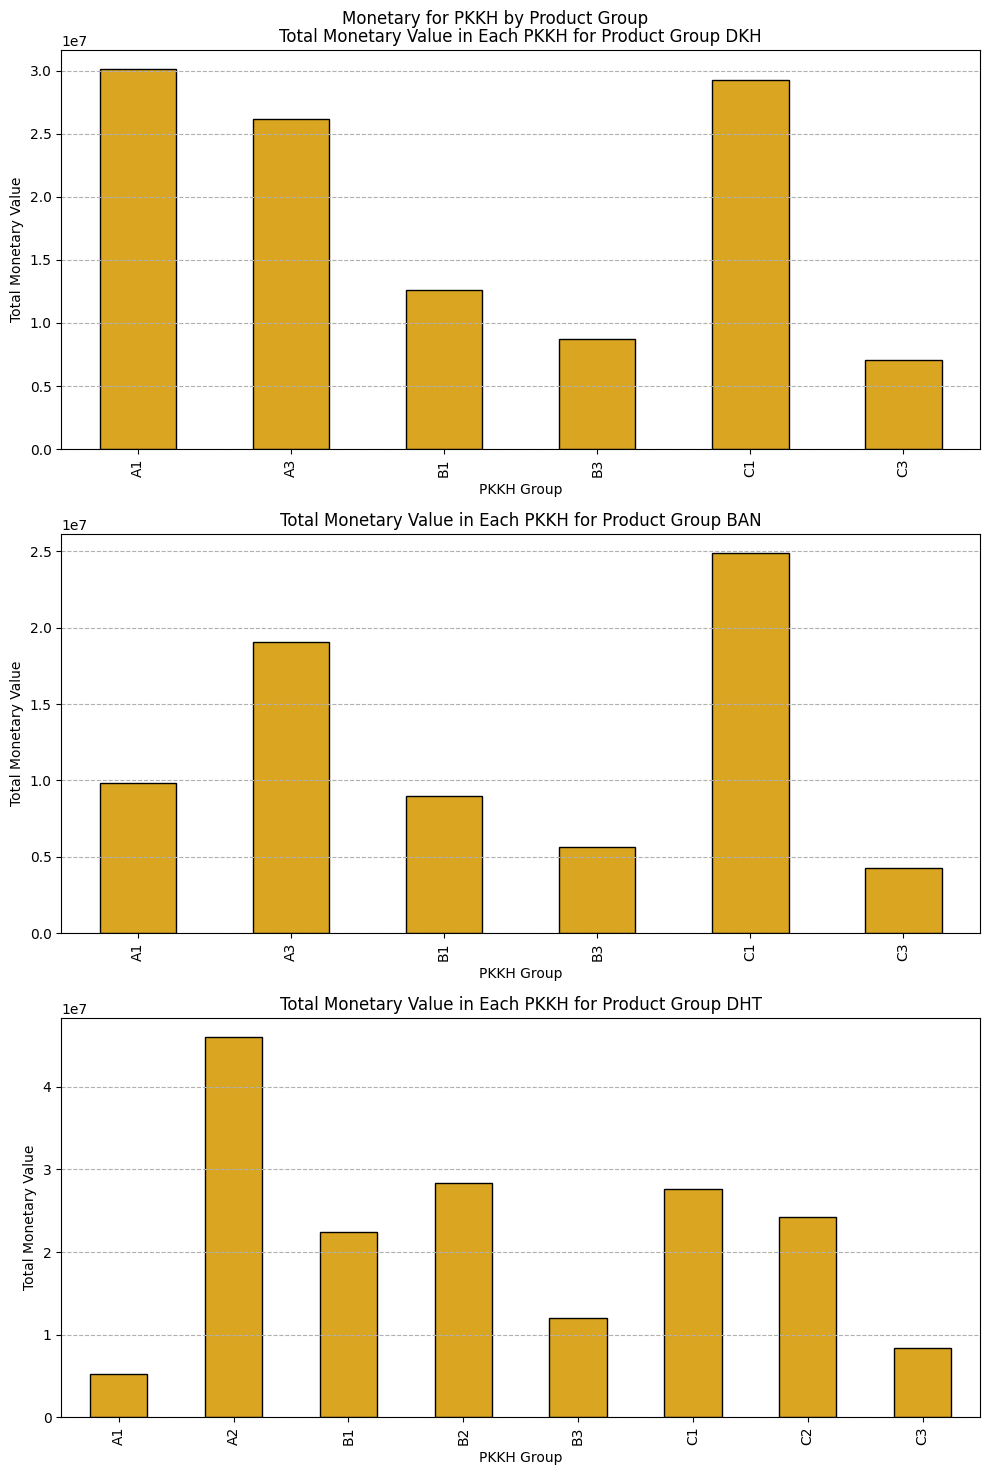

In [48]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
plot_monetary_for_pkkh_by_product_group('DKH', ax=axes[0])
plot_monetary_for_pkkh_by_product_group('BAN', ax=axes[1])
plot_monetary_for_pkkh_by_product_group('DHT', ax=axes[2])
fig.suptitle('Monetary for PKKH by Product Group')
plt.tight_layout()
plt.show()

> **Đối với sản phẩm DKH (Đồ khô)**
- A1 VÀ A3 đều là nhóm khách hàng ưa chuộng đồ ăn vặt trong đó đồ khô lại là một trong những loại có nhiều sản phẩm giới trẻ thích nên tổng số doanh thu của đơn hàng được thực hiện bởi 2 nhóm khách hàng này là nhiều nhất
    - Với A1 nhóm khách hàng này phần lớn là sinh viên học sinh các loại sản phẩm đồ khô thường có giá rẽ tiện lợi và đặc biệt rất hợp khẩu vị đối với giới trẻ 16-22 tuổi
    - Với A3 đây là nhóm khách hàng với như cầu là các sản phẩm có tính tiện lợi và dễ bảo quản để phù hợp cho việc mang theo đi chơi cho các buổi tiệc hay picnic
    - Với A2 thì đặc tính là nhóm khách hàng quan tâm đến sức khỏe thì nhóm mặt hàng này không được ưu chuộng đối với họ
- B1 VÀ B3 : Phước
- C1 VÀ C3 : NGỌC

> **Đối với sản phẩm BAN (Bánh)**
- A1 VÀ A3 đều là nhóm khách hàng ưa chuộng đồ  ăn vặt trong đó bánh lại là một trong những loại có nhiều sản phẩm giới trẻ thích nên tổng số doanh thu đơn hàng được thực hiện bởi nhóm khách hàng A1 là nhiều nhất
    - Với A1 nhóm khách hàng này phần lớn là sinh viên học sinh các loại sản phẩm bánh thường có giá rẽ , tiện lợi và đặc biệt rất hợp khẩu vị đối với giới trẻ 16-22 tuổi
    - Với A3 đây là nhóm khách hàng với như cầu là các sản phẩm có tính tiện lợi và dễ bảo quản để phù hợp cho việc mang theo đi chơi cho các buổi tiệc hay picnic
    - Với A2 thì đặc tính là nhóm khách hàng quan tâm đến sức khỏe thì nhóm mặt hàng này không được ưu chuộng đối với họ
- B1 VÀ B3 : Phước
- C1 VÀ C3 : NGỌC

> **Đối với sản phẩm DHT (Đồ ăn healthy)**
- A2 VÀ A1 đều nhóm khách hàng ưa chuộng đồ ăn healthy , trong đó A2 là nhóm khách hàng quan tâm đến sức khỏe nên tổng số doanh thu của đơn hàng được thực hiện bởi nhóm khách hàng A2 là nhiều nhất
    - A2 với đặc tính quan tâm đến sức khỏe họ có tính ưu chuộng đối với các sản phẩm lành mạnh
    - A1 Thì không quan tâm nhiều đối với sản phẩm này là do về mặt giá cả
- B1 B2 VÀ B3 : Phước
- C1 C2 VÀ C3 : NGỌC

## Chỉ số RFM của các nhóm phân khúc khách hàng theo mã nhóm hàng

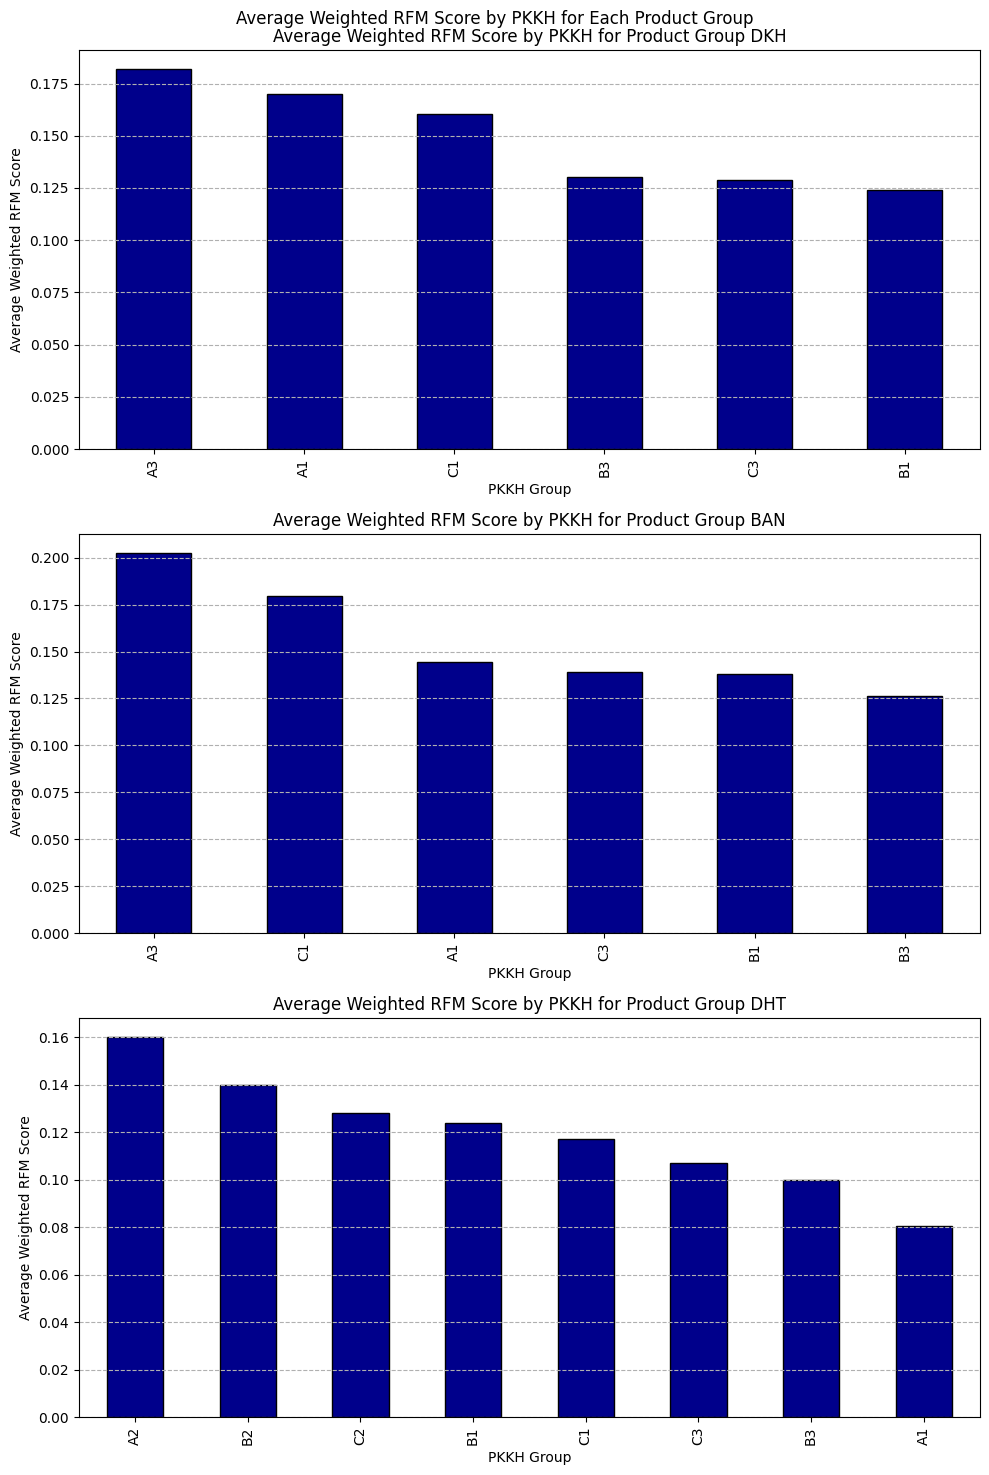

In [49]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
calculate_weighted_rfm(df, 'DKH', ax=axes[0])
calculate_weighted_rfm(df, 'BAN', ax=axes[1])
calculate_weighted_rfm(df, 'DHT', ax=axes[2])
fig.suptitle('Average Weighted RFM Score by PKKH for Each Product Group')
plt.tight_layout()
plt.show()


> **Đối với sản phẩm DKH (Đồ khô)**
- A1 VÀ A3 đều là nhóm khách hàng ưa chuộng đồ ăn vặt trong đó đồ khô lại là một trong những loại có nhiều sản phẩm giới trẻ thích nên điểm só RFM của đơn hàng được thực hiện bởi 2 nhóm khách hàng này là nhiều nhất ĐIỀU ĐO CHO THẤY VỚI MẶT HÀNG NÀY NHÓM KHÁCH HÀNG A1 VÀ A3 LÀ 2 NHÓM KHÁCH HÀNG QUAN TRỌNG
    - Với A1 nhóm khách hàng này phần lớn là sinh viên học sinh các loại sản phẩm đồ khô thường có giá rẽ tiện lợi và đặc biệt rất hợp khẩu vị đối với giới trẻ 16-22 tuổi
    - Với A3 đây là nhóm khách hàng với như cầu là các sản phẩm có tính tiện lợi và dễ bảo quản để phù hợp cho việc mang theo đi chơi cho các buổi tiệc hay picnic
    - Với A2 thì đặc tính là nhóm khách hàng quan tâm đến sức khỏe thì nhóm mặt hàng này không được ưu chuộng đối với họ
- B1 VÀ B3 : Phước
- C1 VÀ C3 : NGỌC

> **Đối với sản phẩm BAN (Bánh)**
- A1 VÀ A3 đều là nhóm khách hàng ưa chuộng đồ  ăn vặt trong đó bánh lại là một trong những loại có nhiều sản phẩm giới trẻ thích nên điểm só RFM của đơn hàng được thực hiện bởi 2 nhóm khách hàng này là cũng đáng kể ĐIỀU ĐÓ CHO THẤY VỚI MẶT HÀNG NÀY NHÓM KHÁCH HÀNG A1 VÀ A3 LÀ 2 NHÓM KHÁCH HÀNG cũng rất QUAN TRỌNG
    - Với A1 nhóm khách hàng này phần lớn là sinh viên học sinh các loại sản phẩm bánh thường có giá rẽ , tiện lợi và đặc biệt rất hợp khẩu vị đối với giới trẻ 16-22 tuổi
    - Với A3 đây là nhóm khách hàng với như cầu là các sản phẩm có tính tiện lợi và dễ bảo quản để phù hợp cho việc mang theo đi chơi cho các buổi tiệc hay picnic
    - Với A2 thì đặc tính là nhóm khách hàng quan tâm đến sức khỏe thì nhóm mặt hàng này không được ưu chuộng đối với họ
- B1 VÀ B3 : Phước
- C1 VÀ C3 : NGỌC

> **Đối với sản phẩm DHT (Đồ ăn healthy)**
- A2 VÀ A1 đều nhóm khách hàng ưa chuộng đồ ăn healthy , trong đó A2 là nhóm khách hàng quan tâm đến sức khỏe nên điểm só RFM của đơn hàng được thực hiện bởi nhóm khách hàng này nhiều nhất
    - A2 với đặc tính quan tâm đến sức khỏe họ có tính ưu chuộng đối với các sản phẩm lành mạnh
    - A1 Thì không quan tâm nhiều đối với sản phẩm này là do về mặt giá cả nên không được cao so với tổng thể
- B1 B2 VÀ B3 : Phước
- C1 C2 VÀ C3 : NGỌC

# CHỈ SỐ RFM CỦA TỪNG KHÁCH HÀNG TRONG CÁC NHÓM PKKH


## Chỉ số RFM của khách hàng trong nhóm mặt hàng DKH

<ipython-input-52-2f5c895dab74>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recency', y=top_10_customers.index, data=top_10_customers.sort_values('Recency'), ax=axs[0], palette='viridis')
<ipython-input-52-2f5c895dab74>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y=top_10_customers.index, data=top_10_customers.sort_values('Frequency', ascending=False), ax=axs[1], palette='viridis')
<ipython-input-52-2f5c895dab74>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Monetary', y=top_10_customers.index, data=top_1

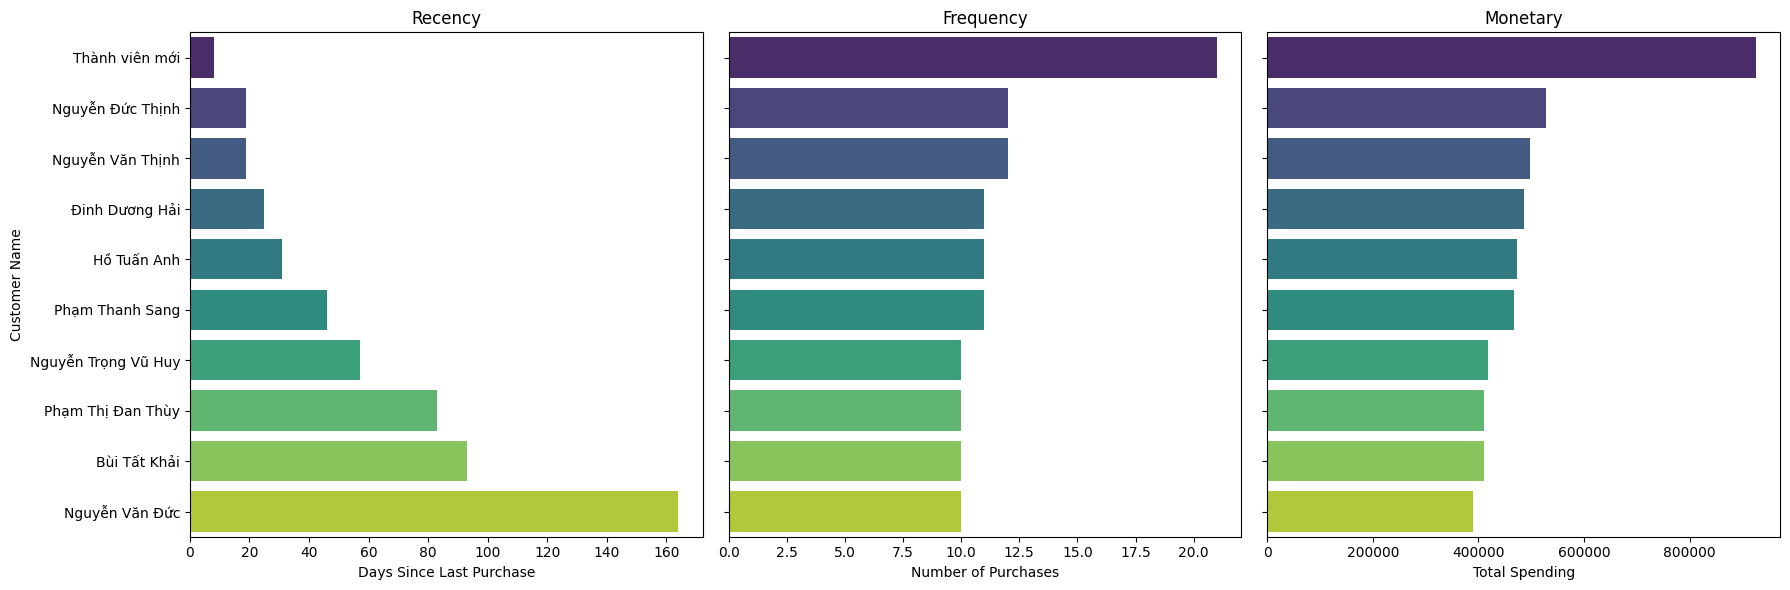

In [53]:
plot_rfm_for_customers_by_pkkh_and_product_group(df, 'DKH')

## Chỉ số RFM của khách hàng trong nhóm mặt hàng BAN

<ipython-input-52-2f5c895dab74>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recency', y=top_10_customers.index, data=top_10_customers.sort_values('Recency'), ax=axs[0], palette='viridis')
<ipython-input-52-2f5c895dab74>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y=top_10_customers.index, data=top_10_customers.sort_values('Frequency', ascending=False), ax=axs[1], palette='viridis')
<ipython-input-52-2f5c895dab74>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Monetary', y=top_10_customers.index, data=top_1

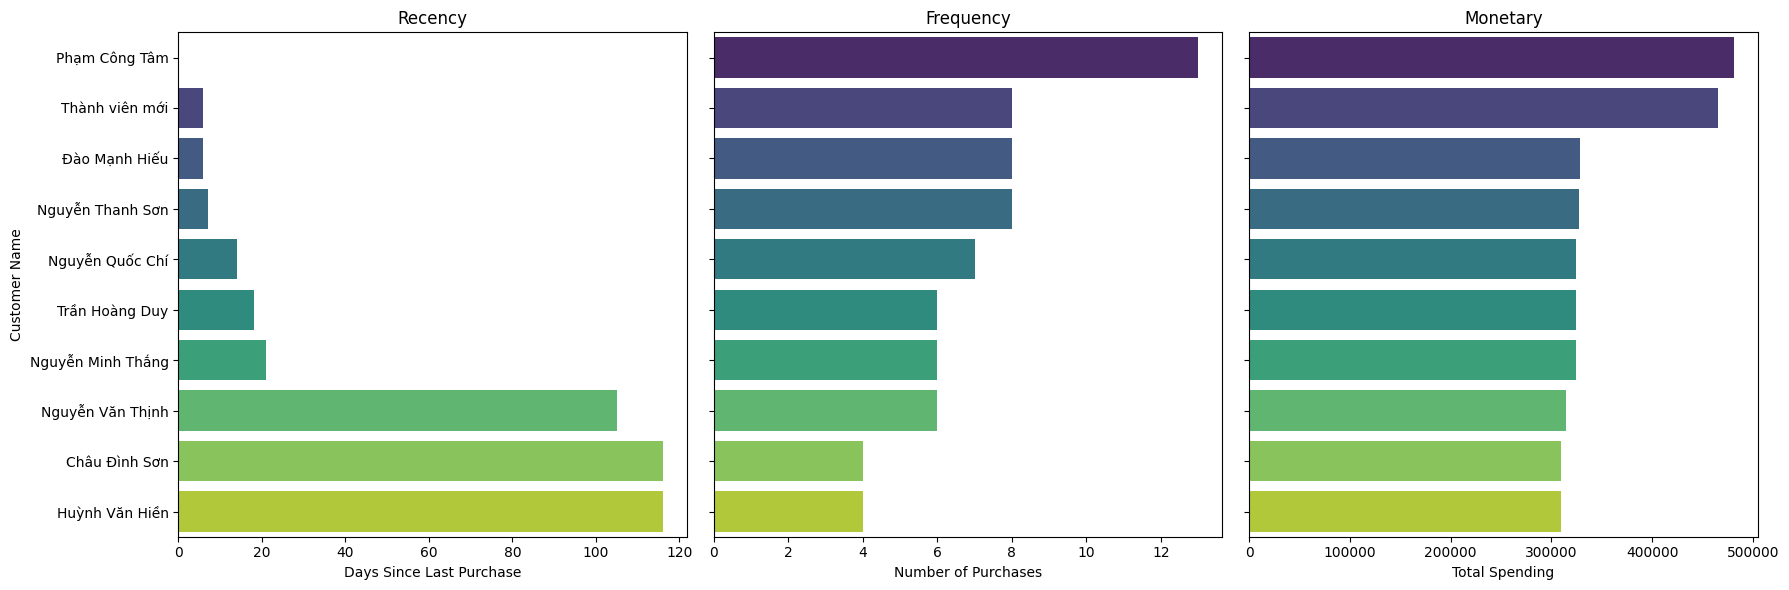

In [54]:
plot_rfm_for_customers_by_pkkh_and_product_group(df, 'BAN')

## Chỉ số RFM của khách hàng trong nhóm mặt hàng DHT

<ipython-input-52-2f5c895dab74>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recency', y=top_10_customers.index, data=top_10_customers.sort_values('Recency'), ax=axs[0], palette='viridis')
<ipython-input-52-2f5c895dab74>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y=top_10_customers.index, data=top_10_customers.sort_values('Frequency', ascending=False), ax=axs[1], palette='viridis')
<ipython-input-52-2f5c895dab74>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Monetary', y=top_10_customers.index, data=top_1

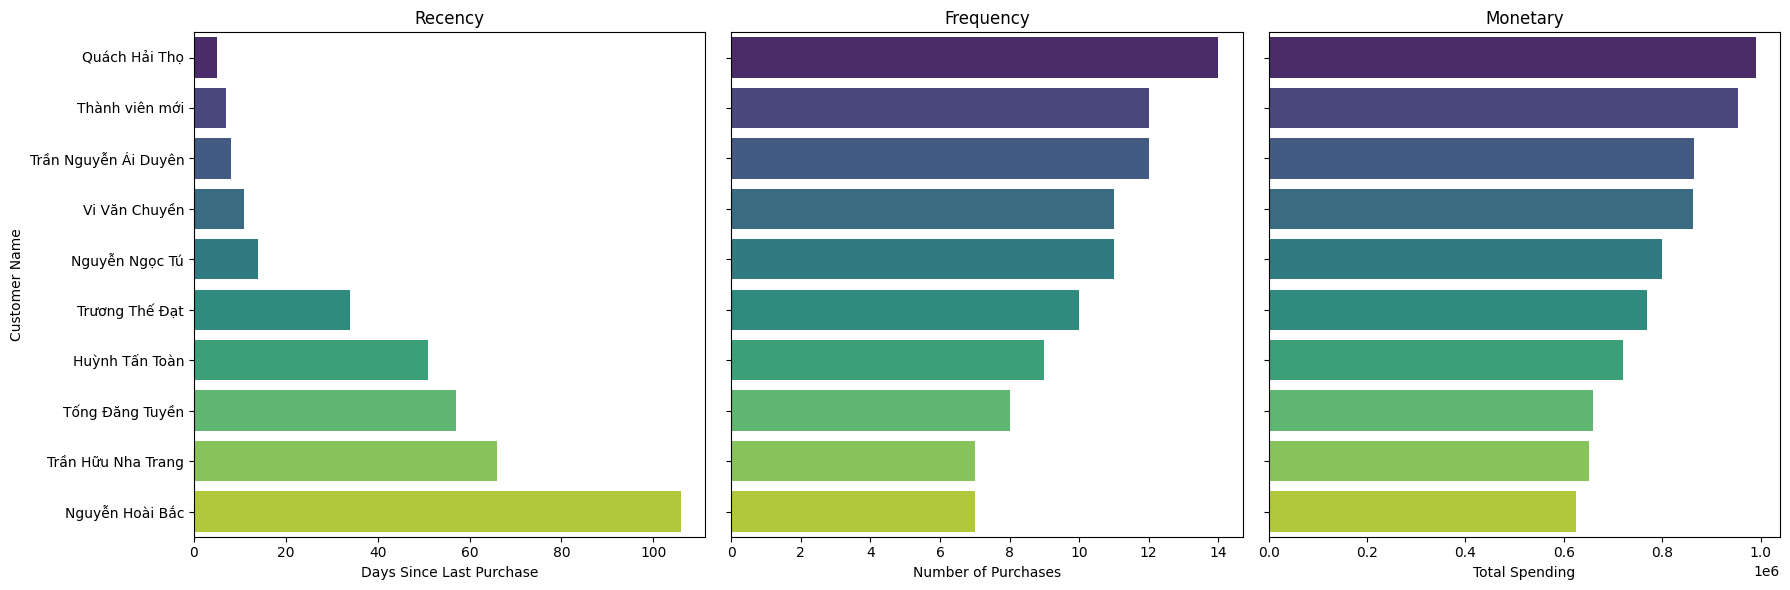

In [55]:
plot_rfm_for_customers_by_pkkh_and_product_group(df, 'DHT')